In [1]:
#This KMeans analysis is just to show how to perform KMeans clustering in simple way focusing on the methodology and without trying to find the appopriate data to achieve it.
#I am using supermarket sales dataset from Kaggle
#import some important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px  # interactive charts
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
# For Notebooks
init_notebook_mode(connected=True)
import cufflinks as cf
# For offline use
cf.go_offline()

In [3]:
file=pd.read_csv("C:/Users/gluma/Downloads/Supermarket Sales/supermarket_sales - Sheet1.csv")

In [3]:
#see how data looks like
file.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
#check for number of rows in columns and investigate the type of data
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
#check for duplicates. These are unique transactions
file[["Invoice ID"]].value_counts().sort_values(ascending=False)

Invoice ID 
101-17-6199    1
115-99-4379    1
132-32-9879    1
132-23-6451    1
102-06-2002    1
              ..
892-05-6689    1
894-41-5205    1
895-03-6665    1
895-66-0685    1
898-04-2717    1
Length: 1000, dtype: int64

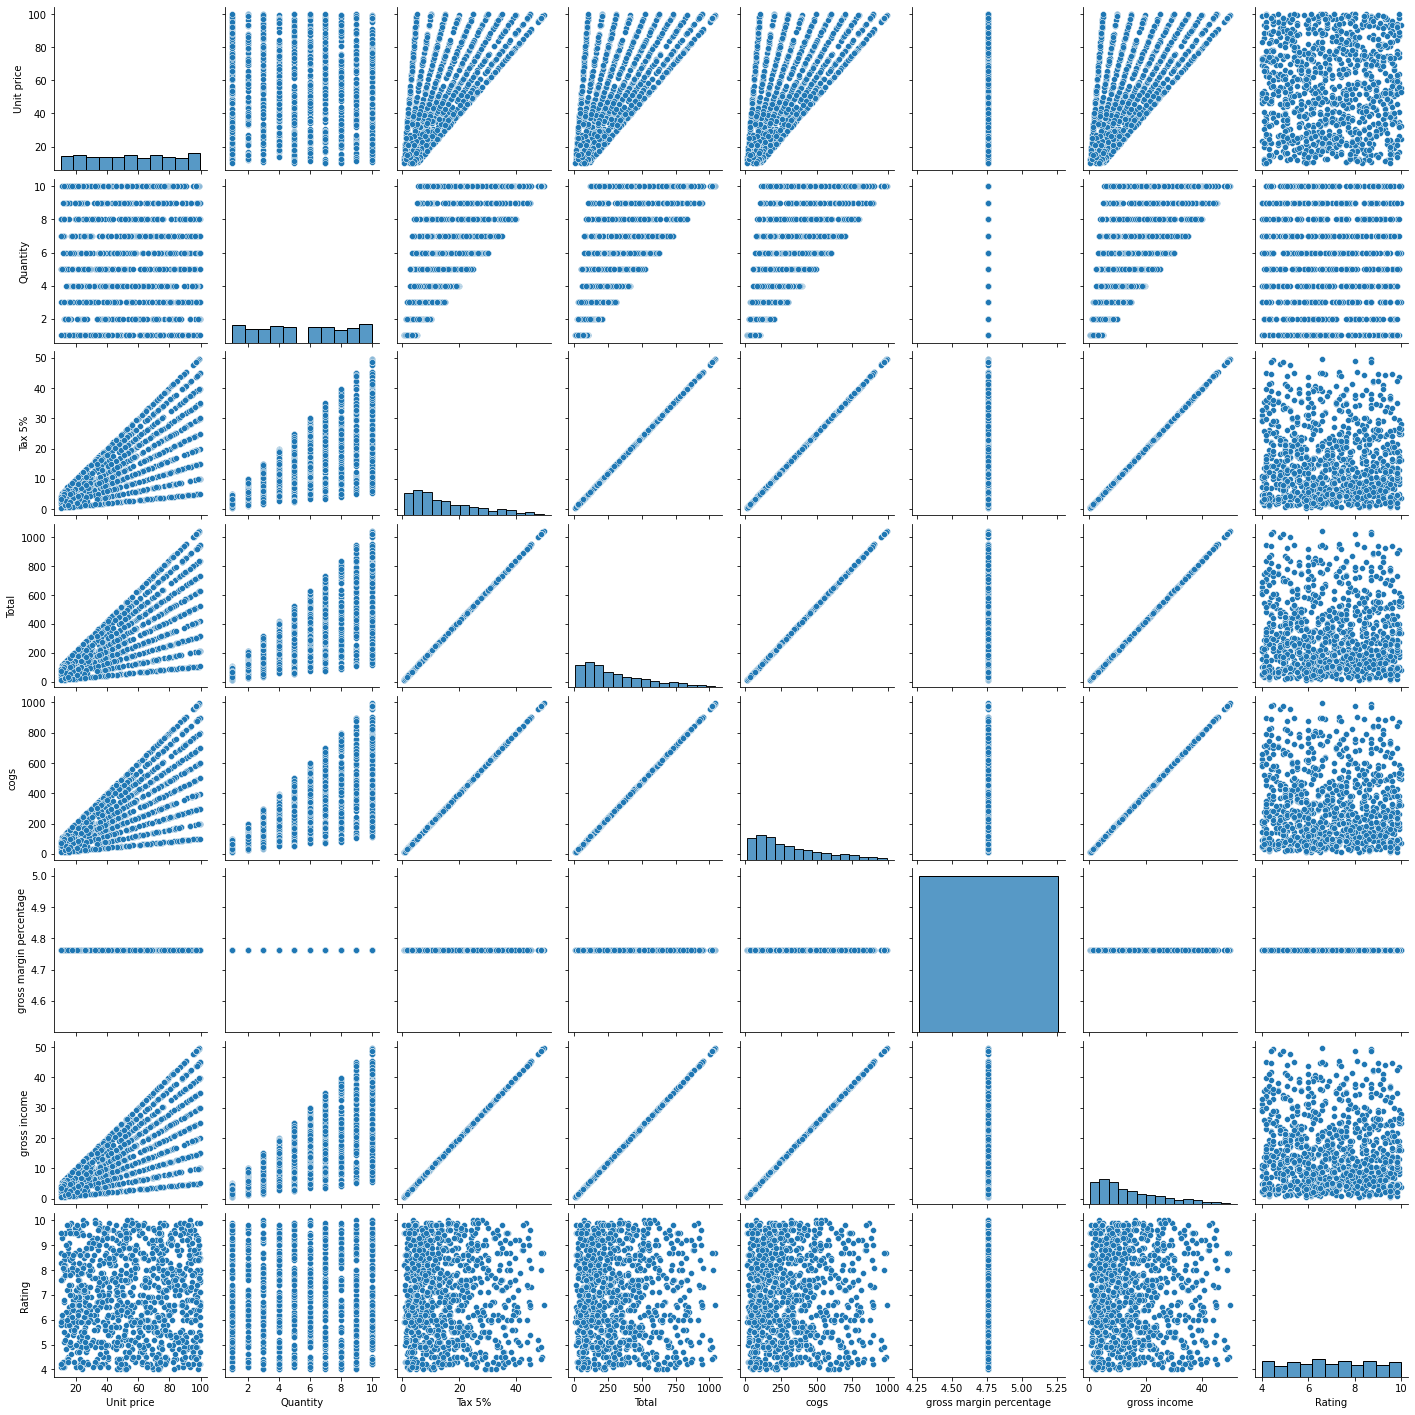

In [6]:
#check for relationship between variables.
sns.pairplot(file)

In [4]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Normalize data
scaler = MinMaxScaler()

scaler.fit(file[['Total']])
file['Total'] = scaler.transform(file[['Total']])

scaler.fit(file[['Rating']])
file['Rating'] = scaler.transform(file[['Rating']])

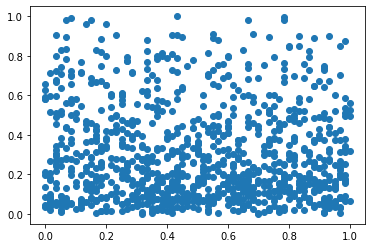

In [5]:
#Plot the data
plt.scatter(file['Rating'],file['Total'])

In [6]:
#Elbow Plot
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(file[['Total','Rating']])
    sse.append(km.inertia_)

C:\Users\gluma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



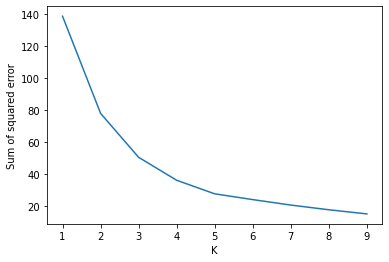

In [7]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [8]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(file[['Total','Rating']])
y_predicted
file['cluster']=y_predicted
file.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,cluster
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,0.521616,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,0.850000,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,0.067387,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,0.933333,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,0.319628,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,0.566667,0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,0.463549,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,0.733333,0
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,0.604377,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,0.216667,1


In [9]:
km.cluster_centers_

array([[0.24072997, 0.7757384 ],
       [0.67574869, 0.38350084],
       [0.17992839, 0.27762726]])

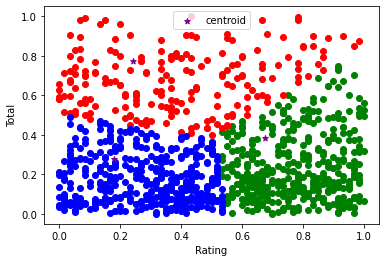

In [40]:
#Simple way to present clusters after normalization
df=file[["Total","Rating",'cluster']]
col_x = 'Rating'
col_y = 'Total'
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.scatter(df1['Rating'],df1['Total'],color='green')
plt.scatter(df2['Rating'],df2['Total'],color='red')
plt.scatter(df3['Rating'],df3['Total'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

C:\Users\gluma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Rating', ylabel='Total'>

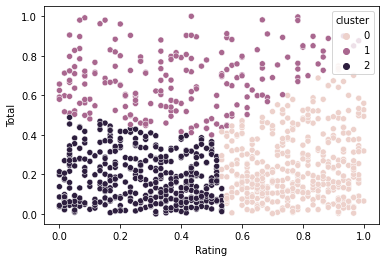

In [44]:
#Different representation using scatterplot
sns.scatterplot(file.Rating,file.Total,hue=file.cluster)